In [1]:
# Etapa 1: Leitura e análise inicial dos dados

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_excel('dados_rio_e_chuva.xlsx')

# Exibir as primeiras linhas
df.head()


,NivelRiodoSul,NívelItuporanga,ChuvaItuporanaga,NívelTaió,ChuvaTaió
0,170,30,3.0,98,0.0
1,170,39,12.0,98,0.0
2,169,59,19.0,98,0.0
3,169,82,5.0,98,0.0
4,169,27,1.0,97,0.0


In [2]:
# Verificar informações gerais
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65408 entries, 0 to 65407
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NivelRiodoSul     65408 non-null  int64  
 1   NívelItuporanga   65408 non-null  int64  
 2   ChuvaItuporanaga  65408 non-null  float64
 3   NívelTaió         65408 non-null  int64  
 4   ChuvaTaió         65408 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.5 MB


In [3]:
# Verificar valores ausentes
print("Valores ausentes por coluna:\n", df.isnull().sum())

# Remover duplicatas
df = df.drop_duplicates()

# Se existirem valores ausentes, remover ou preencher com média
df = df.fillna(df.mean(numeric_only=True))


Valores ausentes por coluna:
 NivelRiodoSul       0
NívelItuporanga     0
ChuvaItuporanaga    0
NívelTaió           0
ChuvaTaió           0
dtype: int64


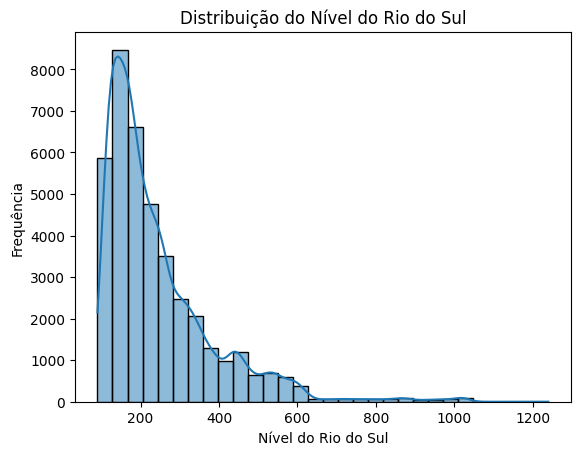

In [6]:
# Histograma da variável alvo
sns.histplot(df['NivelRiodoSul'], bins=30, kde=True)
plt.title('Distribuição do Nível do Rio do Sul')
plt.xlabel('Nível do Rio do Sul')
plt.ylabel('Frequência')
plt.show()


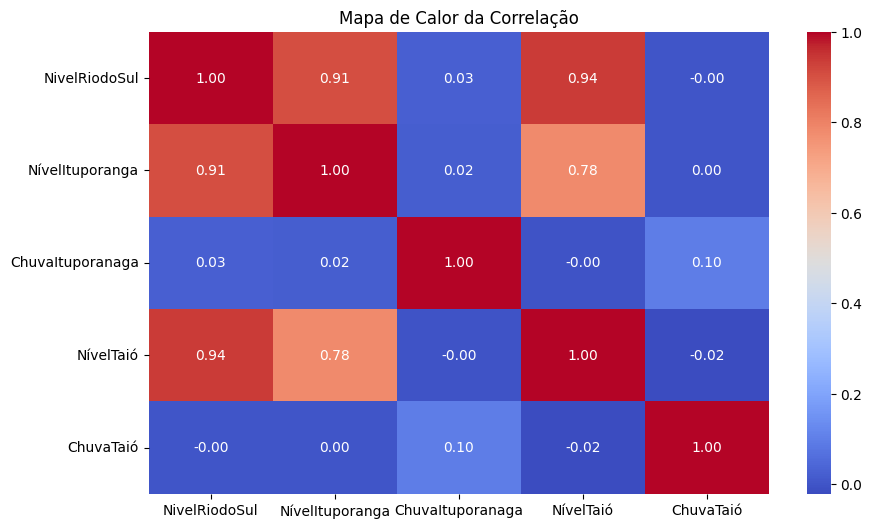

In [8]:
# Correlação entre as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor da Correlação")
plt.show()


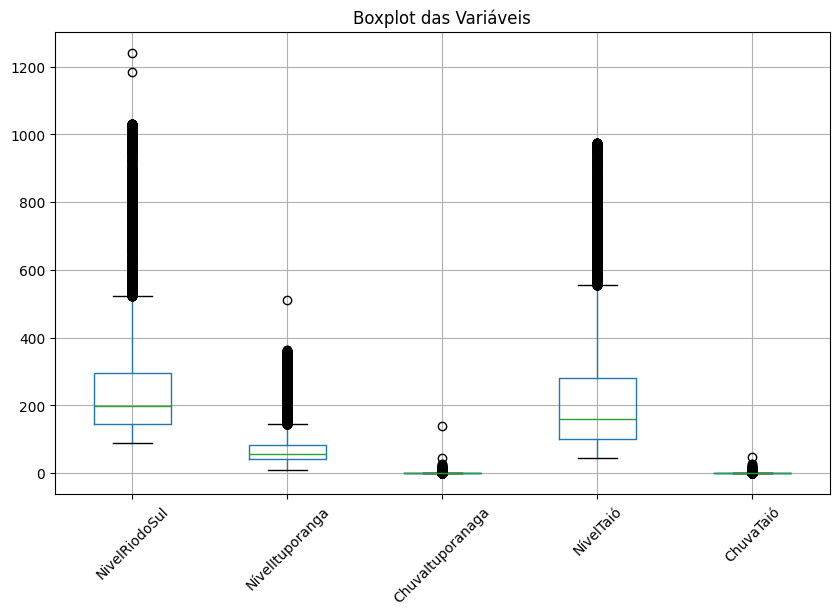

In [9]:
# Boxplot para detectar outliers
df[['NivelRiodoSul', 'NívelItuporanga', 'ChuvaItuporanaga', 'NívelTaió', 'ChuvaTaió']].boxplot(figsize=(10, 6))
plt.title("Boxplot das Variáveis")
plt.xticks(rotation=45)
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Variáveis preditoras e alvo
X = df[['NívelItuporanga', 'ChuvaItuporanaga', 'NívelTaió', 'ChuvaTaió']]
y = df['NivelRiodoSul']

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Treinamento
model = LinearRegression()
model.fit(X_train, y_train)

# Previsão
y_pred = model.predict(X_test)

# Avaliação
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 29.27
MAE: 18.55
R²: 0.96


In [21]:
import joblib

# Salvar modelo treinado
joblib.dump(model, 'modelo_nivel_rio_sul.joblib')

# Salvar escalador utilizado na normalização
joblib.dump(scaler, 'escalador_nivel_rio_sul.joblib')


['escalador_nivel_rio_sul.joblib']

In [20]:
# Carregar modelo e scaler
modelo = joblib.load('modelo_rio.joblib')
scaler = joblib.load('scaler_rio.joblib')

# Entrada do usuário
ituporanga_nivel = float(input("Nível Ituporanga (m): "))
ituporanga_chuva = float(input("Chuva Ituporanga (mm): "))
taio_nivel = float(input("Nível Taió (m): "))
taio_chuva = float(input("Chuva Taió (mm): "))

# Criar DataFrame com nomes corretos
entrada_df = pd.DataFrame([[ituporanga_nivel, ituporanga_chuva, taio_nivel, taio_chuva]],
                          columns=['NívelItuporanga', 'ChuvaItuporanaga', 'NívelTaió', 'ChuvaTaió'])

# Aplicar transformação
entrada_scaled = scaler.transform(entrada_df)

# Fazer a previsão
previsao = modelo.predict(entrada_scaled)

print(f"Previsão do nível do Rio do Sul: {previsao[0]:.2f} metros")

Nível Ituporanga (m):  10
Chuva Ituporanga (mm):  20
Nível Taió (m):  30
Chuva Taió (mm):  40


Previsão do nível do Rio do Sul: 215.63 metros
